In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import chardet

with open("/content/spam.csv", "rb") as f:
    result = chardet.detect(f.read(600000))  # read first 100 KB
    print(result)


{'encoding': 'Windows-1252', 'confidence': 0.7269493857068697, 'language': ''}


In [4]:
spam = pd.read_csv('/content/spam.csv',encoding="Windows-1252")

In [5]:
spam.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1710,ham,"(No promises on when though, haven't even gott...",NaN,NaN,NaN
1648,ham,If u laugh really loud.. If u talk spontaneous...,NaN,NaN,NaN
4581,ham,Wow didn't think it was that common. I take it...,NaN,NaN,NaN
3652,ham,It has issues right now. Ill fix for her by to...,NaN,NaN,NaN
3353,ham,R u sure they'll understand that! Wine * good ...,NaN,NaN,NaN


In [6]:
spam.shape

(5572, 5)

In [7]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#Data Cleaning

In [8]:
spam.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [9]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Renaming the columns
spam.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [12]:
spam["target"].value_counts()

,count
target,
ham,4825
spam,747


In [13]:
# Label Encoding as the target columns has 2 classes only
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
spam["target"] = encoder.fit_transform(spam["target"])

In [14]:
# ham->0 , spam->1
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
spam["text"].duplicated().sum()

np.int64(403)

In [16]:
spam = spam.drop_duplicates(subset="text",keep='first')

In [17]:
spam["text"].duplicated().sum()

np.int64(0)

In [18]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
spam["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

([<matplotlib.patches.Wedge at 0x7b97f67220f0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37%'),
  Text(0.553363565906573, -0.231924047755212, '12.63%')])

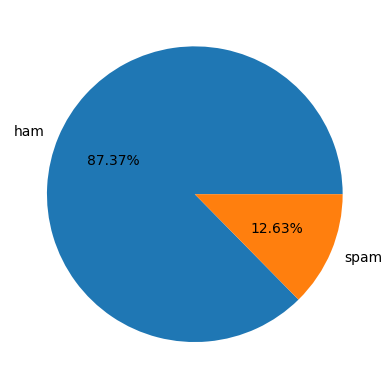

In [20]:
plt.pie(spam["target"].value_counts() , labels=["ham","spam"] , autopct="%0.2f%%")

In [21]:
!pip install nltk

In [22]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
spam["num_characters"] = spam["text"].apply(len)

In [24]:
from nltk.tokenize import word_tokenize,sent_tokenize
spam["num_words"] = spam["text"].apply(lambda x:len(word_tokenize(x)))
spam["num_sentences"] = spam["text"].apply(lambda x:len(sent_tokenize(x)))

In [25]:
spam.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


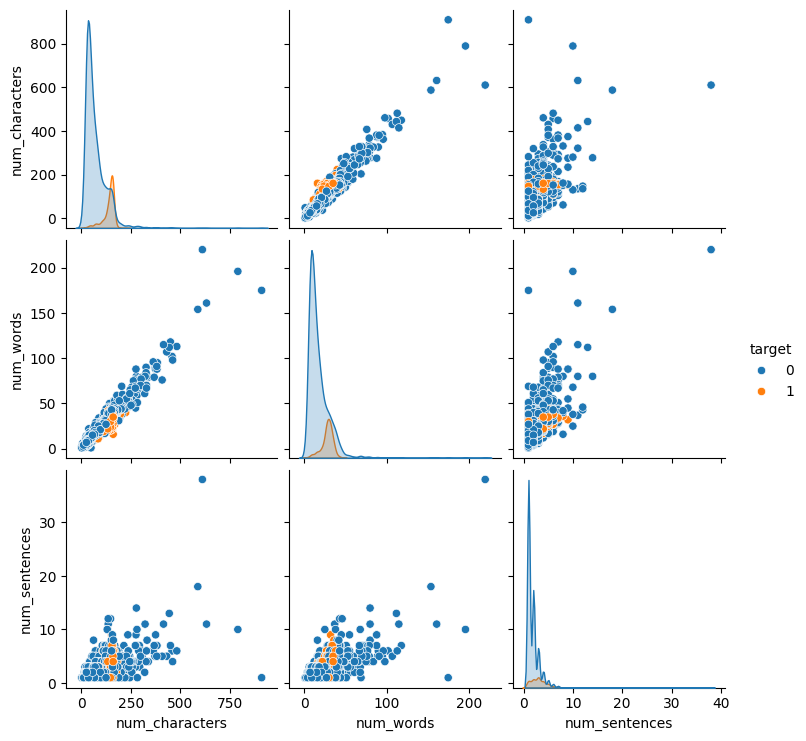

In [26]:
sns.pairplot(spam,hue="target")

<Axes: >

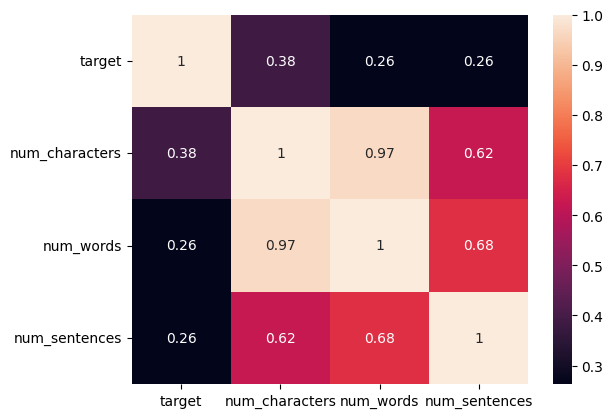

In [27]:
sns.heatmap(spam.drop(columns=["text"]).corr(),annot=True)

#Text Preprocessing

- lowercase
- word_tokenize
- special charecters remove
- stop words remove and punctuation remove
- stemming/Lemmetizing


In [28]:
import string
def text_transform(text):
  exclude = string.punctuation
  text = text.lower()
  text = nltk.word_tokenize(text)

  y= []
  for word in text :
    if word.isalnum():
      y.append(word)
  text = y[:]
  y.clear()

  for word in text:
    if word not in nltk.corpus.stopwords.words('english') and word not in string.punctuation:
      y.append(word)
  text = y[:]
  y.clear()

  for word in text:
    y.append(nltk.stem.WordNetLemmatizer().lemmatize(word))
  return " ".join(y)
  text = y[:]
  y.clear()
  return text


In [29]:
spam["transformed_text"]=spam["text"].apply(text_transform)

In [30]:
spam.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
5480,0,Have you seen who's back at Holby?!,35,10,2,seen back holby
844,0,K.k:)when are you going?,24,8,1,going
4334,0,"Now u sound like manky scouse boy steve,like! ...",115,26,2,u sound like manky scouse boy steve like trave...
4421,0,MMM ... Fuck .... Merry Christmas to me,39,8,1,mmm fuck merry christmas
3716,0,I'm gonna rip out my uterus.,28,9,1,gon na rip uterus


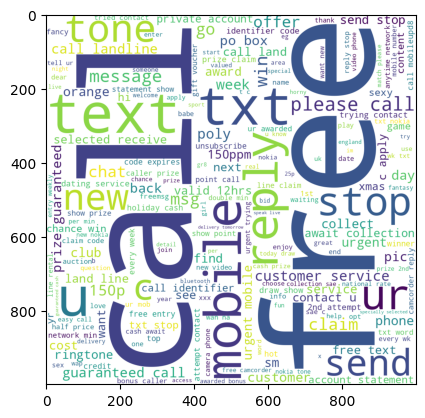

In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")
spam_wc = wc.generate(spam[spam["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

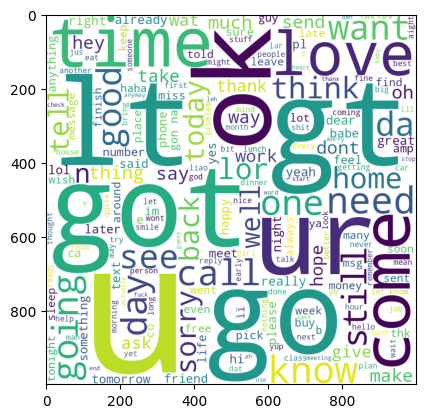

In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")
ham_wc = wc.generate(spam[spam["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [33]:
list_of_words = spam[spam["target"]==1]["transformed_text"].str.cat(sep=" ").split(" ")
dict = {}
for word in list_of_words:
  if word in dict:
    dict[word]+=1
  else:
    dict[word]=1
dict_sorted = sorted(dict.items(),key=lambda x:x[1],reverse=True)
spam_most_common_words = pd.DataFrame(dict_sorted[0:30],columns=["word","frequency"])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'u'),
  Text(5, 0, 'text'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobile'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'claim'),
  Text(10, 0, 'reply'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'c'),
  Text(14, 0, 'get'),
  Text(15, 0, 'new'),
  Text(16, 0, 'service'),
  Text(17, 0, 'tone'),
  Text(18, 0, 'send'),
  Text(19, 0, 'urgent'),
  Text(20, 0, 'nokia'),
  Text(21, 0, 'phone'),
  Text(22, 0, 'cash'),
  Text(23, 0, 'contact'),
  Text(24, 0, 'week'),
  Text(25, 0, 'please'),
  Text(26, 0, 'win'),
  Text(27, 0, 'min'),
  Text(28, 0, 'customer'),
  Text(29, 0, 'guaranteed')])

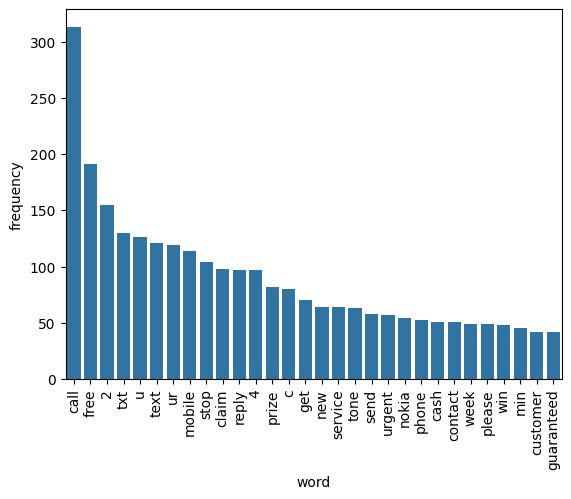

In [34]:
sns.barplot(x=spam_most_common_words["word"],y=spam_most_common_words["frequency"])
plt.xticks(rotation=90)

In [35]:
list_of_words = spam[spam["target"]==0]["transformed_text"].str.cat(sep=" ").split(" ")
dict2 = {}
for word in list_of_words:
  if word in dict2:
    dict2[word]+=1
  else:
    dict2[word]=1
dict2_sorted = sorted(dict2.items(),key=lambda x:x[1],reverse=True)
ham_most_common_words = pd.DataFrame(dict2_sorted[0:30],columns=["word","frequency"])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'get'),
  Text(2, 0, 'gt'),
  Text(3, 0, 'lt'),
  Text(4, 0, '2'),
  Text(5, 0, 'go'),
  Text(6, 0, 'got'),
  Text(7, 0, 'know'),
  Text(8, 0, 'come'),
  Text(9, 0, 'like'),
  Text(10, 0, 'ok'),
  Text(11, 0, 'time'),
  Text(12, 0, 'good'),
  Text(13, 0, 'ur'),
  Text(14, 0, 'call'),
  Text(15, 0, 'day'),
  Text(16, 0, 'want'),
  Text(17, 0, 'love'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'going'),
  Text(21, 0, 'lor'),
  Text(22, 0, '4'),
  Text(23, 0, 'home'),
  Text(24, 0, 'still'),
  Text(25, 0, 'da'),
  Text(26, 0, 'see'),
  Text(27, 0, 'think'),
  Text(28, 0, 'r'),
  Text(29, 0, 'back')])

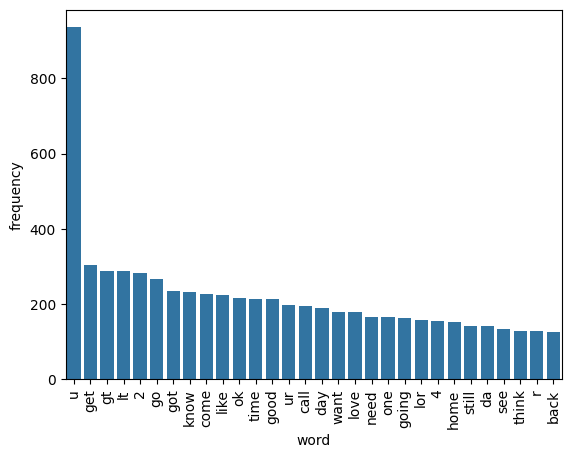

In [36]:
sns.barplot(x=ham_most_common_words["word"],y=ham_most_common_words["frequency"])
plt.xticks(rotation=90)

#**Model** **Building**

In [37]:
spam["target"].value_counts(normalize=True)

,proportion
target,
0,0.87367
1,0.12633


In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB,CategoricalNB
from sklearn.metrics import accuracy_score,classification_report

In [39]:
X_train,X_test,y_train,y_test = train_test_split(spam["transformed_text"],spam["target"],test_size=0.2,random_state=2)
cv = CountVectorizer(ngram_range=(1,1))
X_train_vec = cv.fit_transform(X_train).toarray()
X_test_vec = cv.transform(X_test).toarray()

Tfidf = TfidfVectorizer(ngram_range=(1,1))
X_train_vec_tfidf = Tfidf.fit_transform(X_train).toarray()
X_test_vec_tfidf = Tfidf.transform(X_test).toarray()

In [40]:
X_test_vec.shape

(1034, 6605)

In [41]:
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_vec,y_train)

gnb = GaussianNB()
gnb.fit(X_train_vec,y_train)



GaussianNB()

In [44]:
mnb2 = MultinomialNB(alpha=0.1)
mnb2.fit(X_train_vec_tfidf,y_train)

gnb2 = GaussianNB()
gnb2.fit(X_train_vec_tfidf,y_train)


GaussianNB()

In [42]:
from sklearn.metrics import precision_score
y_pred1 = mnb.predict(X_test_vec)
print(f"accuracy : {accuracy_score(y_test,y_pred1)}")
print(f"precision : {precision_score(y_test,y_pred1)}")

print("\n")

y_pred2= gnb.predict(X_test_vec)
print(f"accuracy : {accuracy_score(y_test,y_pred2)}")
print(f"precision : {precision_score(y_test,y_pred2)}")


accuracy : 0.9816247582205029
precision : 0.9541984732824428


accuracy : 0.8945841392649904
precision : 0.5700483091787439


In [45]:
from sklearn.metrics import recall_score,precision_score
y_pred1 = mnb2.predict(X_test_vec_tfidf)
print(f"accuracy : {accuracy_score(y_test,y_pred1)}")
print(f"precision : {precision_score(y_test,y_pred1)}")

print("\n")

y_pred2= gnb2.predict(X_test_vec_tfidf)
print(f"accuracy : {accuracy_score(y_test,y_pred2)}")
print(f"precision : {precision_score(y_test,y_pred2)}")

accuracy : 0.97678916827853
precision : 0.9672131147540983


accuracy : 0.8907156673114119
precision : 0.5615763546798029


In [46]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train_vec,y_train)
y_pred = svc.predict(X_test_vec)
print(f"accuracy : {accuracy_score(y_test,y_pred)}")
print(f"precision : {precision_score(y_test,y_pred)}")

print("\n")

svc2 = SVC(kernel="linear")
svc2.fit(X_train_vec_tfidf,y_train)
y_pred2 = svc2.predict(X_test_vec_tfidf)
print(f"accuracy : {accuracy_score(y_test,y_pred2)}")
print(f"precision : {precision_score(y_test,y_pred2)}")

print("\n")

svc3 = SVC(kernel="rbf")
svc3.fit(X_train_vec,y_train)
y_pred3 = svc3.predict(X_test_vec)
print(f"accuracy : {accuracy_score(y_test,y_pred3)}")
print(f"precision : {precision_score(y_test,y_pred3)}")

print("\n")


svc4 = SVC(kernel="rbf")
svc4.fit(X_train_vec_tfidf,y_train)
y_pred4 = svc4.predict(X_test_vec_tfidf)
print(f"accuracy : {accuracy_score(y_test,y_pred4)}")
print(f"precision : {precision_score(y_test,y_pred4)}")

accuracy : 0.9787234042553191
precision : 0.9833333333333333


accuracy : 0.97678916827853
precision : 0.975


accuracy : 0.9680851063829787
precision : 0.981651376146789


accuracy : 0.9748549323017408
precision : 0.9827586206896551


In [47]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train_vec,y_train)
y_pred = xgbc.predict(X_test_vec)
print(f"accuracy : {accuracy_score(y_test,y_pred)}")
print(f"precision : {precision_score(y_test,y_pred)}")

print("\n")

xgbc2 = XGBClassifier()
xgbc2.fit(X_train_vec_tfidf,y_train)
y_pred2 = xgbc2.predict(X_test_vec_tfidf)
print(f"accuracy : {accuracy_score(y_test,y_pred2)}")
print(f"precision : {precision_score(y_test,y_pred2)}")

accuracy : 0.9777562862669246
precision : 0.9831932773109243


accuracy : 0.971953578336557
precision : 0.9504132231404959


In [54]:
rf = RandomForestClassifier()
rf.fit(X_train_vec,y_train)
y_pred = rf.predict(X_test_vec)
print(f"accuracy : {accuracy_score(y_test,y_pred)}")
print(f"precision : {precision_score(y_test,y_pred)}")

print("\n")

rf2 = RandomForestClassifier()
rf2.fit(X_train_vec_tfidf,y_train)
y_pred2 = rf2.predict(X_test_vec_tfidf)
print(f"accuracy : {accuracy_score(y_test,y_pred2)}")
print(f"precision : {precision_score(y_test,y_pred2)}")

accuracy : 0.9700193423597679
precision : 0.9908256880733946


accuracy : 0.9709864603481625
precision : 0.9821428571428571


In [49]:
vc = VotingClassifier(estimators=[("svc",svc),("rf",rf),("xbgc",xgbc)])
vc.fit(X_train_vec,y_train)
y_pred = vc.predict(X_test_vec)
print(f"accuracy : {accuracy_score(y_test,y_pred)}")
print(f"precision : {precision_score(y_test,y_pred)}")

accuracy : 0.9787234042553191
precision : 0.9915254237288136


In [50]:
vc = VotingClassifier(estimators=[("svc",svc),("rf",rf),("xbgc",xgbc)])
vc.fit(X_train_vec_tfidf,y_train)
y_pred = vc.predict(X_test_vec_tfidf)
print(f"accuracy : {accuracy_score(y_test,y_pred)}")
print(f"precision : {precision_score(y_test,y_pred)}")

accuracy : 0.9777562862669246
precision : 0.9914529914529915


In [55]:
final_model = RandomForestClassifier()
final_model.fit(X_train_vec_tfidf,y_train)

RandomForestClassifier()

In [56]:
import pickle
pickle.dump(cv,open("vectorizer.pkl","wb"))
pickle.dump(final_model,open("model.pkl","wb"))